In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv("data/train.csv")

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [29]:
y = df["SalePrice"].values


# Feature Selection

Number of properties with gravel: 6


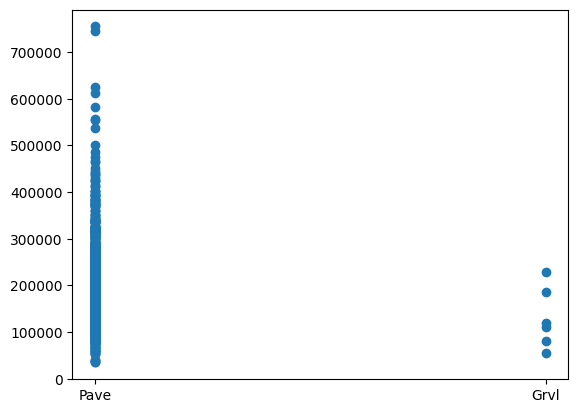

In [43]:
# type of street

print(f"Number of properties with gravel: {np.sum([df['Street']=='Grvl'])}")
plt.scatter(df["Street"], df["SalePrice"])

# not enough gravel streets

In [52]:
# type of alley access

np.sum(df["Alley"].notna())

# not enough data

91

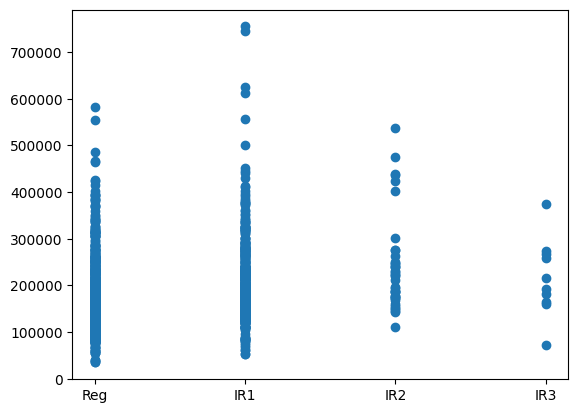

In [53]:
plt.scatter(df["LotShape"], df["SalePrice"])


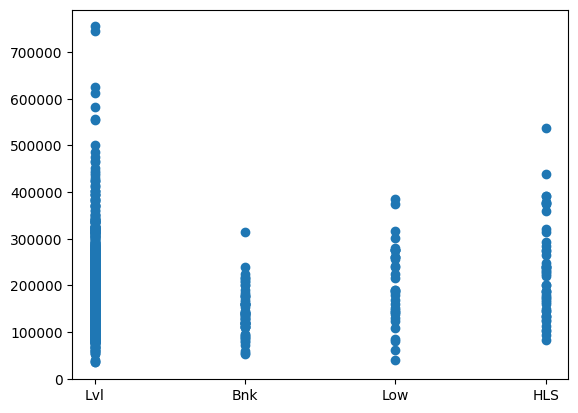

In [54]:
plt.scatter(df["LandContour"], df["SalePrice"])


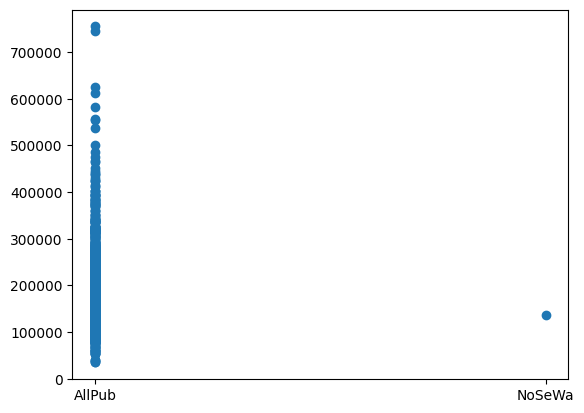

In [56]:
plt.scatter(df["Utilities"], df["SalePrice"])

# not enough data

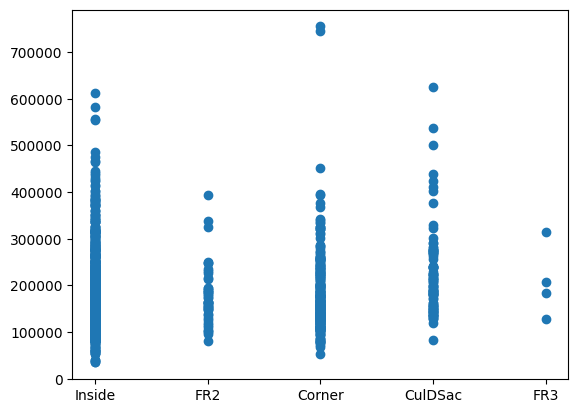

In [57]:
plt.scatter(df["LotConfig"], df["SalePrice"])


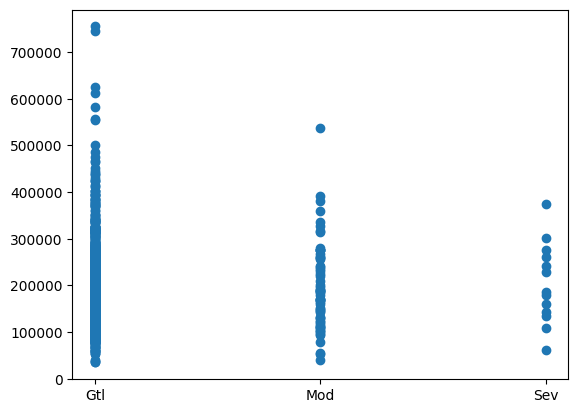

In [61]:
plt.scatter(df["LandSlope"], df["SalePrice"])

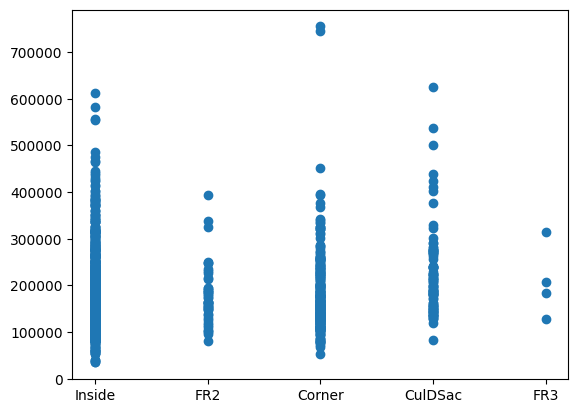

In [62]:
plt.scatter(df["LotConfig"], df["SalePrice"])

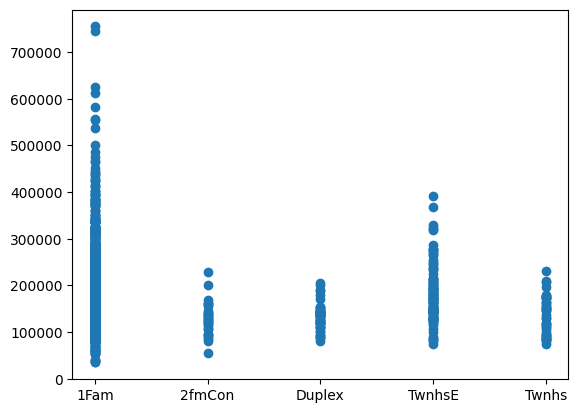

In [63]:
plt.scatter(df["BldgType"], df["SalePrice"])

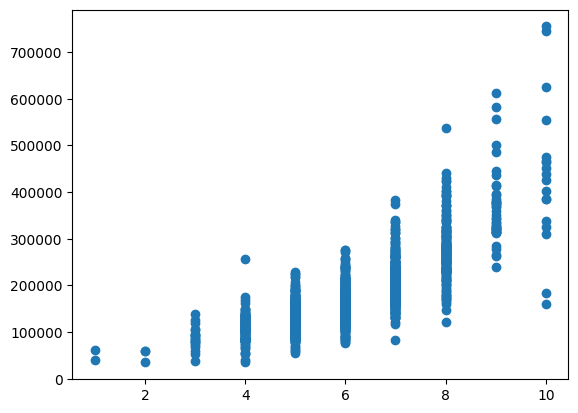

In [64]:
plt.scatter(df["OverallQual"], df["SalePrice"])

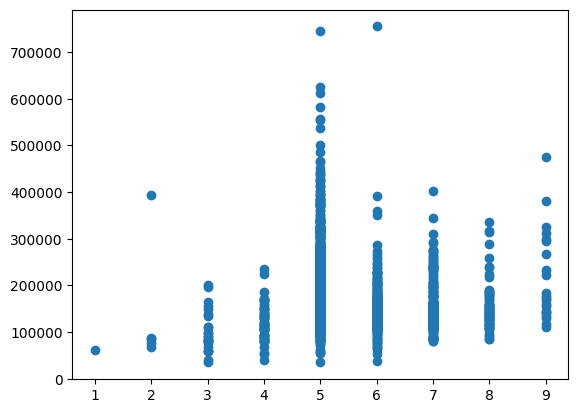

In [65]:
plt.scatter(df["OverallCond"], df["SalePrice"])

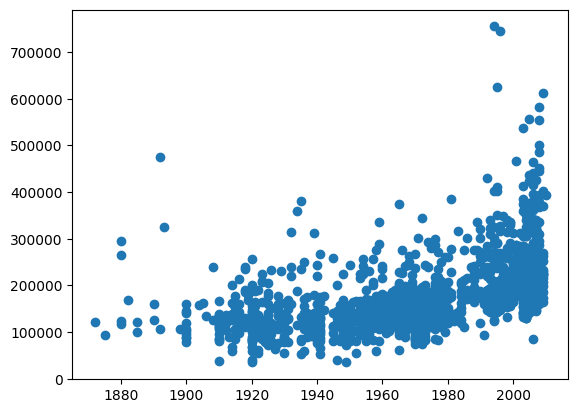

In [66]:
plt.scatter(df["YearBuilt"], df["SalePrice"])

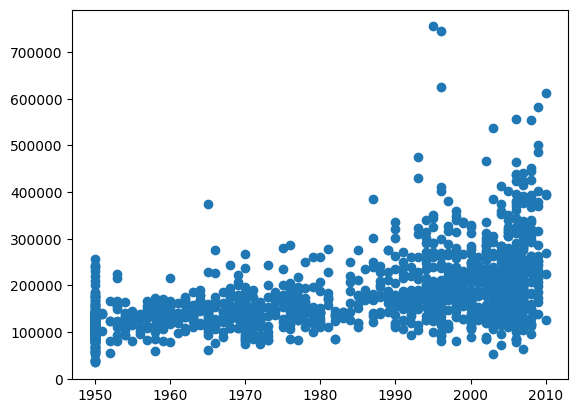

In [68]:
plt.scatter(df["YearRemodAdd"], df["SalePrice"])

# Data preprocessing

In [88]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, OrdinalEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer



obj_cols = ["LandSlope", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtFinType1", "BsmtFinType2", "HeatingQC", "KitchenQual", "Functional", "GarageQual"]
bin_cols = ["CentralAir"]
ord_cols = ["OverallQual", "OverallCond"]
num_cols = ["YearBuilt", "YearRemodAdd", "MiscVal", "MoSold", "YrSold", "LotArea", "TotRmsAbvGrd", "FullBath"]
sq_ft_calc = ["TotalBsmtSF", "1stFlrSF", "2ndFlrSF"]


obj_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder()
)

bin_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(drop="if_binary")
)

ord_pipeline = make_pipeline(
    SimpleImputer(strategy="median")
)

num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

def add_cols(x):
    return x[:, [0]]+x[:, [1]]+x[:, [2]]

def add_cols_name(function_transformer, feature_names_in):
    return ["total"]

sq_ft_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(add_cols, feature_names_out=add_cols_name),
    StandardScaler()
)


preprocessing = ColumnTransformer([
    ("obj", obj_pipeline, obj_cols),
    ("bin", bin_pipeline, bin_cols),
    ("ord", ord_pipeline, ord_cols),
    ("num", num_pipeline, num_cols),
    ("sqft", sq_ft_pipeline, sq_ft_calc)
])

processed = preprocessing.fit_transform(df.drop("SalePrice", axis=1), y)

preprocessing.get_feature_names_out()


array(['obj__LandSlope', 'obj__ExterQual', 'obj__ExterCond',
       'obj__BsmtQual', 'obj__BsmtCond', 'obj__BsmtFinType1',
       'obj__BsmtFinType2', 'obj__HeatingQC', 'obj__KitchenQual',
       'obj__Functional', 'obj__GarageQual', 'bin__CentralAir_Y',
       'ord__OverallQual', 'ord__OverallCond', 'num__YearBuilt',
       'num__YearRemodAdd', 'num__MiscVal', 'num__MoSold', 'num__YrSold',
       'num__LotArea', 'num__TotRmsAbvGrd', 'num__FullBath',
       'sqft__total'], dtype=object)

In [89]:
x = preprocessing.fit_transform(df)
x.shape


(1460, 23)

In [90]:
from sklearn.svm import LinearSVR

sv_reg = LinearSVR(epsilon=0.5, random_state=42)

sv_reg.fit(x, y)

c:\Users\jwbar\OneDrive\Not School\Documents\Programming+Raspberry Pi\ML\Learning-ML\env\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\jwbar\OneDrive\Not School\Documents\Programming+Raspberry Pi\ML\Learning-ML\env\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(epsilon=0.5, random_state=42)